In [6]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 

print(tf.__version__)

2.4.0


In [18]:
# load data from fashion mnist
data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = data.load_data()

# set label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_labels[0])


9


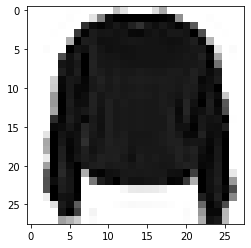

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

In [20]:
# data is tensor of pixel values

plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

# set number range to 0~1
train_images = train_images/ 255.0
test_images = test_images/ 255.0
print(train_images[7])



# set model 
## flatten data

```
[[1],[2],[3]] --> [1,2,3]
```

## in this model
28*28 matrix --> list of 784 items
- input layer : 784 neurons
- output layer : e.g) 9 classes
- hidden layer :


In [24]:
# create model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # make 28*28 matrix to 1d array(784)
    keras.layers.Dense(128, activation="relu"),  # fully connected layer( each neuron conn)
    keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) #

# epochs = how many times the model gonna see this info
model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("tested acc:", test_acc)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6204 - accuracy: 0.7850
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3774 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.8747
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3138 - accuracy: 0.8867
Epoch 5/5
313/313 [==============================] - 2s 3ms/step - loss: 0.3432 - accuracy: 0.8769
tested acc: 0.8769000172615051


In [25]:
# set epochs 10
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("tested acc:", test_acc)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2771 - accuracy: 0.8969
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2552 - accuracy: 0.9049
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2461 - accuracy: 0.9074
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2377 - accuracy: 0.9120
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2300 - accuracy: 0.9146
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2216 - accuracy: 0.9178
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2142 - accuracy: 0.9206
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2091 - accuracy: 0.9213
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.3413 

# using a model to make prediction

In [32]:
prediction = model.predict(test_images)

print(prediction[0])
# get index of largest number
print(np.argmax(prediction[0]))



[2.1248499e-07 7.6230782e-09 2.6253297e-10 4.9899912e-13 6.2708603e-09
 2.3947565e-03 1.9143065e-06 3.6393147e-02 9.7262770e-08 9.6120983e-01]
9


In [33]:
# prediction
print(class_names[np.argmax(prediction[0])])

Ankle boot


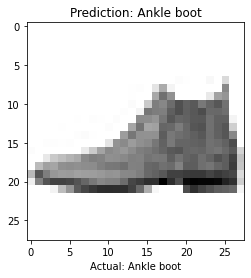

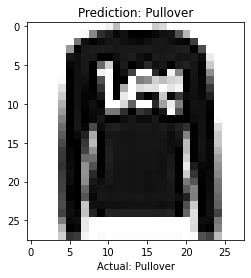

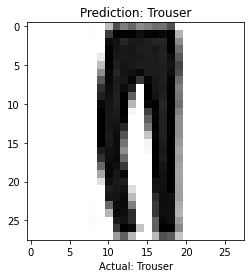

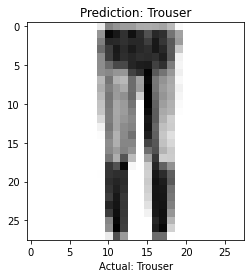

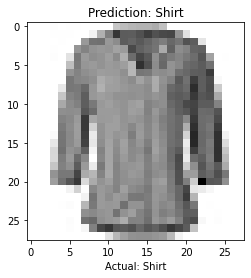

In [37]:
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: "+ class_names[test_labels[i]])
    plt.title("Prediction: "+ class_names[np.argmax(prediction[i])])
    plt.show()